# ARIMA and Seasonal ARIMA
## Autoregressive Integrated Moving Averages 
#### The genral process for ARIMA model is following:
- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA or Seasonal ARIMA based on the data 
- Use the model to make predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df = df.dropna()

In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
df.shape

(105, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   105 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [9]:
df.isnull().sum()

Month                                                     0
Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

In [10]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [11]:
df.columns = ['Month', 'Sales']

In [12]:
df['Month'] = pd.to_datetime(df['Month'])

In [13]:
print(df)

         Month   Sales
0   1964-01-01  2815.0
1   1964-02-01  2672.0
2   1964-03-01  2755.0
3   1964-04-01  2721.0
4   1964-05-01  2946.0
..         ...     ...
100 1972-05-01  4618.0
101 1972-06-01  5312.0
102 1972-07-01  4298.0
103 1972-08-01  1413.0
104 1972-09-01  5877.0

[105 rows x 2 columns]


In [14]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [15]:
df.set_index('Month', inplace=True)

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Month'>

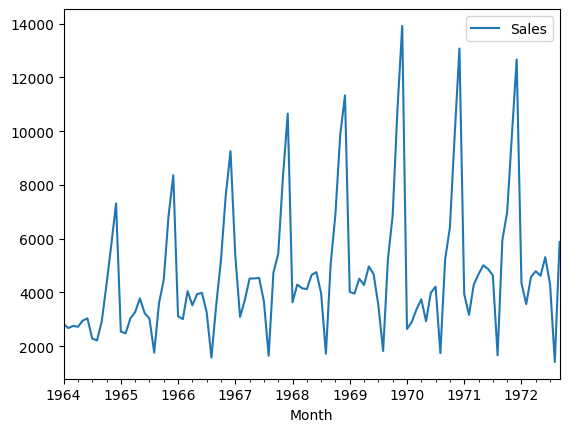

In [17]:
# Seasonal Data 

df.plot()

In [23]:
pip install statsmodels


  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/df/4c/2feda3a9f0e17444a84ba5398ada6a4d2e1b8f832760048f04e2b8ea0c41/statsmodels-0.14.5-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/87/2b/b50d3d08ea0fc419c183a84210571eba005328efa62b6b98bc28e9ead32a/patsy-1.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 393.8 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.6 MB 655.4 kB/s eta 0:00:15
    --------------------------------------- 0.1/9.6 MB 774.0 kB/s eta 0:00:13
   - -------------------------------------- 0.3/9.6 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.6 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.6 M


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
### testing for stationary 

from statsmodels.tsa.stattools import adfuller

In [25]:
test_result = adfuller(df['Sales'])

In [26]:
## H0: It is non stationary 
## H1: It is stationry 

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["ADF Test Statistic", "p-values", "#Lags Used", "Number of Observation Used"]
    for value, label in zip(result, labels):
        print(label + ":" + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0),reject the null hypothesis, Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time searies has a unit root, indiacating it is non-stationary")

In [27]:
adfuller_test(df['Sales'])

ADF Test Statistic:-1.8335930563276195
p-values:0.3639157716602467
#Lags Used:11
Number of Observation Used:93
weak evidence against null hypothesis, time searies has a unit root, indiacating it is non-stationary


Differencing

In [28]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [29]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [30]:
adfuller_test(df["Seasonal First Difference"].dropna())

ADF Test Statistic:-7.626619157213166
p-values:2.0605796968136632e-11
#Lags Used:0
Number of Observation Used:92
Strong evidence against the null hypothesis(H0),reject the null hypothesis, Data has no unit root and is stationary


<Axes: xlabel='Month'>

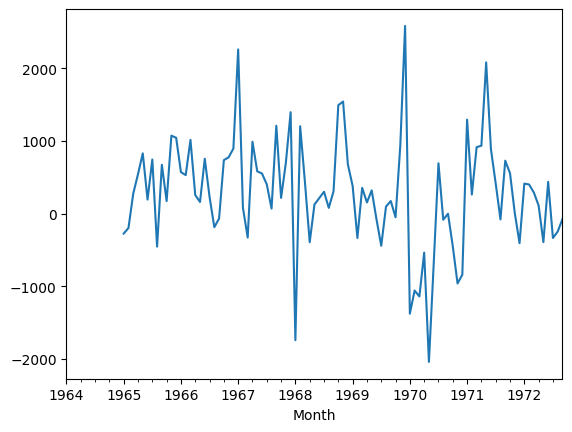

In [31]:
df["Seasonal First Difference"].plot()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [35]:
# df['Seasonal First Difference'].iloc[13:]

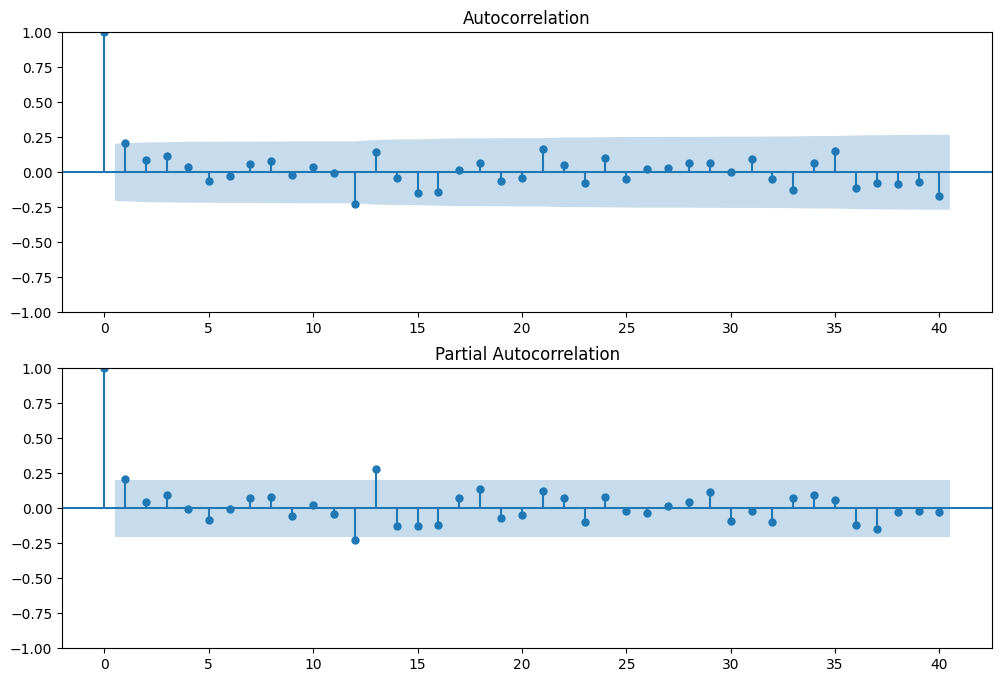

In [36]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)